# **Objective:**


Pixel Transforms are operations you perform one pixel at a time. In this task, you will start by creating histograms.

Histograms display the intensity of the image and can be used to optimize image characteristics. 

You will then apply Intensity Transformations, making objects easier to see by improving image contrast and brightness.

In [1]:
!pip install scikit-image


[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from skimage import exposure, color, filters

# **1.Load the RGB image baboon.png.**

In [3]:
img_pil=Image.open(r"C:\Users\bbuser\Desktop\DataScience-Brain-Bytes\Team_members\from_Hajer\New folder\baboon.png")
Image_np = np.array(img_pil)
print(f"PIL Image format : {img_pil.format}, size: {img_pil.size}, mode: {img_pil.mode}")

PIL Image format : PNG, size: (512, 512), mode: RGB


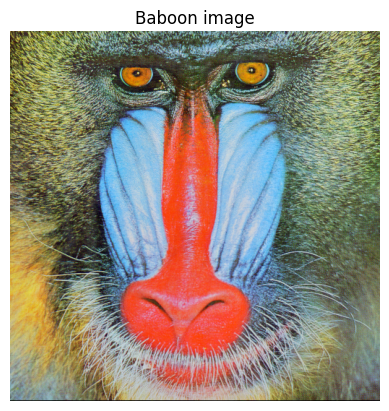

In [4]:
plt.imshow(img_pil)
plt.title("Baboon image")
plt.axis("off")
plt.show()

# **2. Create and display histograms for each color channel (Red, Green, Blue).**

In [5]:
def plot_image(images, titles, cmap=None):
    plt.figure(figsize=(15, 5))
    for i in range(len(images)):
        plt.subplot(1, len(images), i+1)
        plt.imshow(images[i], cmap=cmap if cmap else None)
        plt.title(titles[i])
        plt.axis('off')
    plt.tight_layout()
    plt.show()

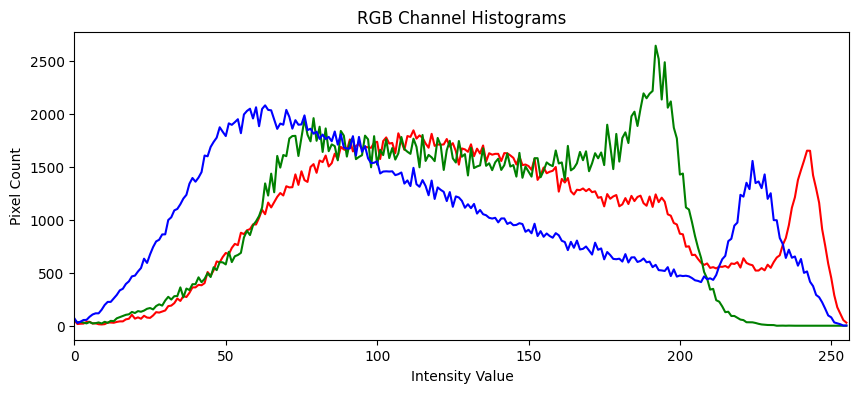

In [6]:
colors = ('r', 'g', 'b')
plt.figure(figsize=(10, 4))
for i, color in enumerate(colors):
    hist = np.histogram(Image_np[..., i], bins=256, range=(0, 256))[0]
    plt.plot(hist, color=color)
plt.title('RGB Channel Histograms')
plt.xlabel('Intensity Value')
plt.ylabel('Pixel Count')
plt.xlim([0, 256])
plt.show()

# **3. Apply intensity transformations to enhance image contrast and brightness.**

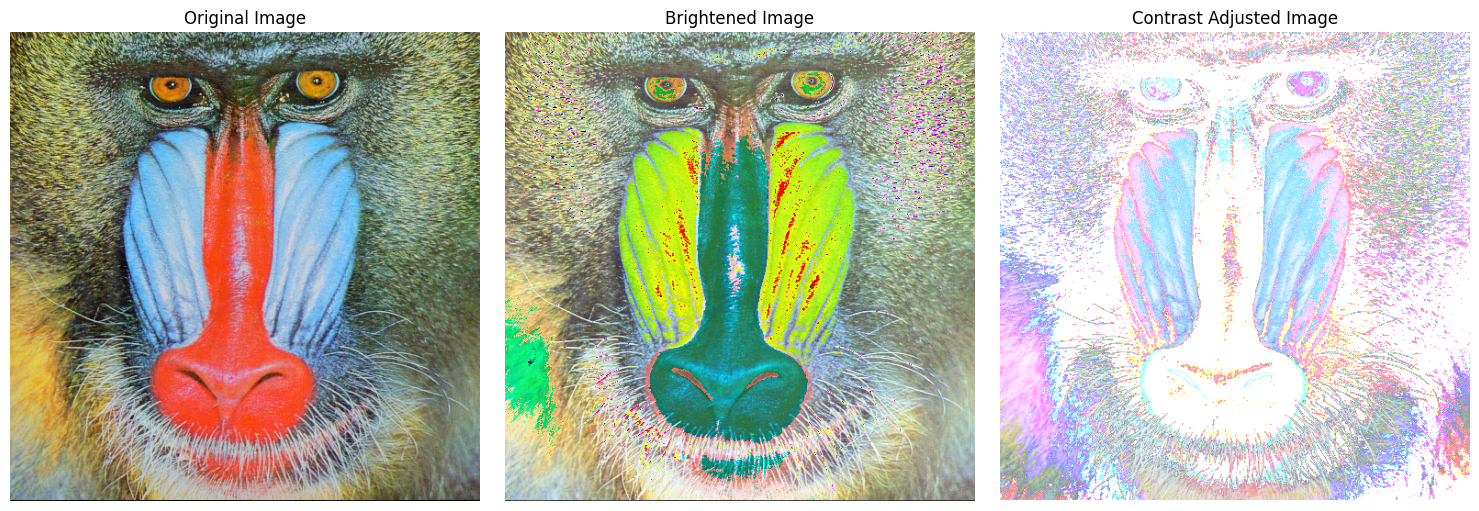

In [7]:
# Brightness adjustment
bright_Image_np = np.clip(Image_np + 50, 0, 255).astype(np.uint8)

# Contrast adjustment (scaling values around 128)
contrast_Image_np = np.clip(1.5 * (Image_np - 128) + 128, 0, 255).astype(np.uint8)

plot_image(
    [Image_np, bright_Image_np, contrast_Image_np],
    ['Original Image', 'Brightened Image', 'Contrast Adjusted Image'])

# **4. Adjust brightness and contrast with chosen transformation functions.**

In [8]:
# Adjust brightness and contrast
def adjust_brightness_contrast(image, alpha=1.3, beta=40):
    # alpha: contrast (1.0–3.0), beta: brightness (0–100)
    adjusted = cv2.convertScaleAbs(image, alpha=alpha, beta=beta)
    return adjusted

# Apply transformation
bright_contrast_img = adjust_brightness_contrast(Image_np)

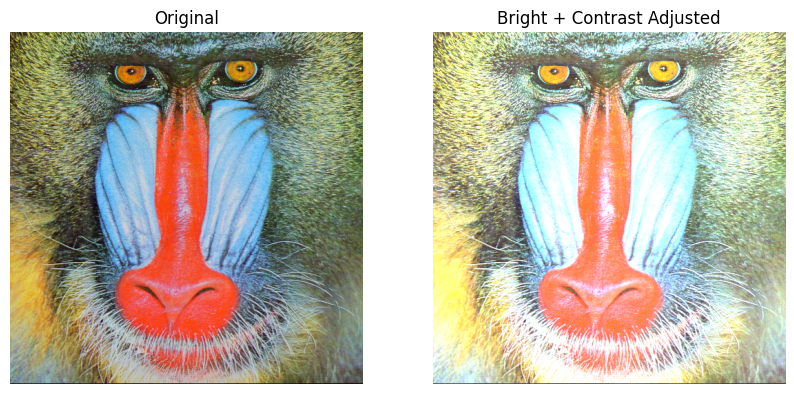

In [9]:
# Show results side by side
def show_images(title1, img1, title2, img2):
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.title(title1)
    plt.imshow(img1)
    plt.axis('off')
    plt.subplot(1, 2, 2)
    plt.title(title2)
    plt.imshow(img2)
    plt.axis('off')
    plt.show()

show_images("Original", Image_np, "Bright + Contrast Adjusted", bright_contrast_img)

# **5. Perform histogram equalization on each channel.**

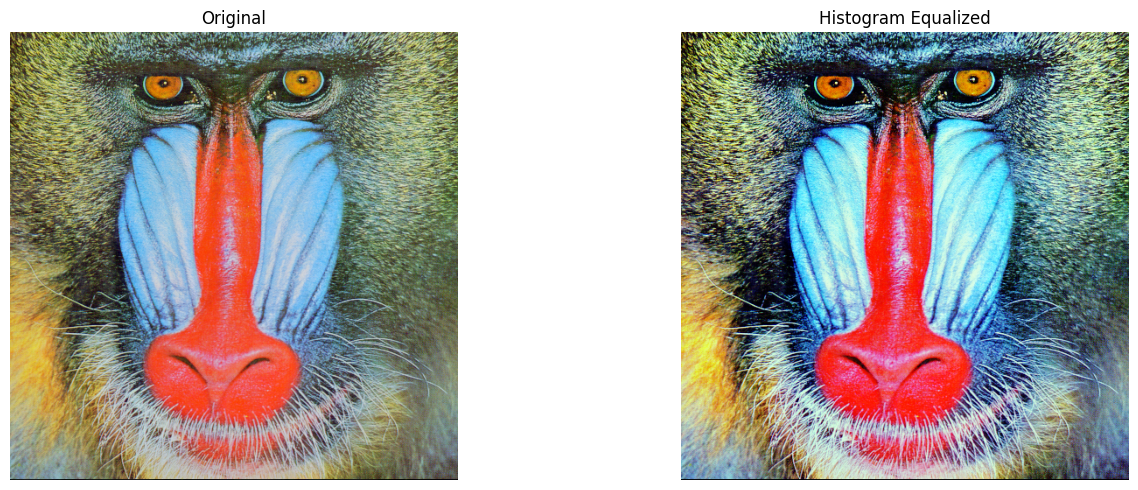

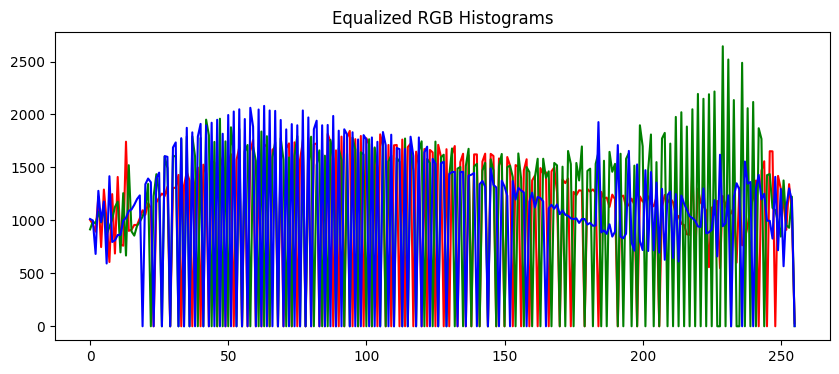

In [10]:
# Equalize each channel separately
r_eq = exposure.equalize_hist(Image_np[..., 0])
g_eq = exposure.equalize_hist(Image_np[..., 1])
b_eq = exposure.equalize_hist(Image_np[..., 2])

# Combine and scale back to 0–255 range
equalized_Image_np = np.stack([
    (r_eq * 255).astype(np.uint8),
    (g_eq * 255).astype(np.uint8),
    (b_eq * 255).astype(np.uint8)
], axis=-1)

plot_image([Image_np, equalized_Image_np], ['Original', 'Histogram Equalized'])

# Plot histograms for equalized image
plt.figure(figsize=(10, 4))
for i, color in enumerate(colors):
    hist = np.histogram(equalized_Image_np[..., i], bins=256, range=(0, 256))[0]
    plt.plot(hist, color=color)
plt.title('Equalized RGB Histograms')
plt.show()

# 6. Convert the image to grayscale and create its histogram.**

In [14]:
# Convert to grayscale
from skimage import color
gray_image = color.rgb2gray(Image_np / 255.0)

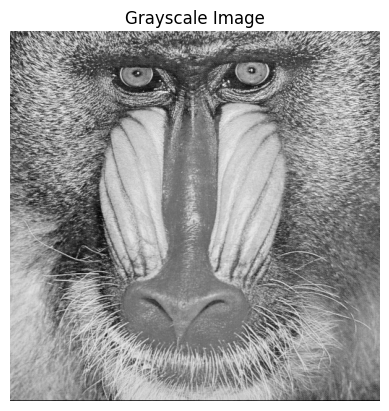

In [15]:
# Display grayscale image
plt.imshow(gray_image, cmap='gray')
plt.title("Grayscale Image")
plt.axis('off')
plt.show()

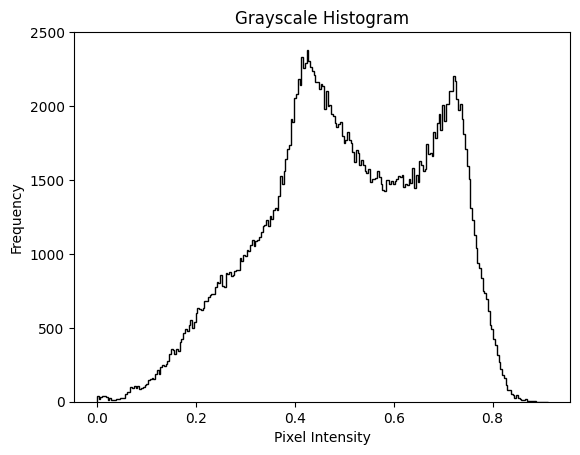

In [16]:
# Histogram of grayscale
plt.hist(gray_image.ravel(), bins=256, histtype='step', color='black')
plt.title("Grayscale Histogram")
plt.xlabel("Pixel Intensity")
plt.ylabel("Frequency")
plt.show()

# **7. Apply Otsu’s thresholding to segment objects from the grayscale image.**

In [17]:
# Apply Otsu's threshold
threshold_value = filters.threshold_otsu(gray_image)
binary_image = gray_image > threshold_value

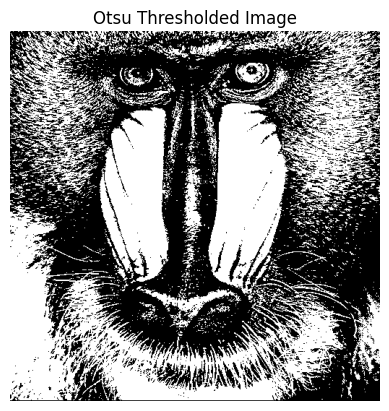

In [18]:
# Display thresholded image
plt.imshow(binary_image, cmap='gray')
plt.title("Otsu Thresholded Image")
plt.axis('off')
plt.show()